# A2: Bias in data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

## STEP 0: BACKGROUND RESEARCH

### Step 0.1: Download datasets

In [2]:
##Make Folders
if os.path.isdir('data')==False:
    os.mkdir('data')
if os.path.isdir('images')==False:
    os.mkdir('images')

In [3]:
!wget https://ndownloader.figshare.com/files/7394539 -O data/toxicity_annotations.csv 

--2020-10-22 20:16:57--  https://ndownloader.figshare.com/files/7394539
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 176.34.141.126, 54.76.76.248, 34.240.85.170, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|176.34.141.126|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394539/toxicity_annotations.tsv [following]
--2020-10-22 20:16:58--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394539/toxicity_annotations.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.90.131
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.90.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36177321 (35M) [binary/octet-stream]
Saving to: ‘data/toxicity_annotations.csv’

data/toxicity_annot 100%[===================>]  34.50M  13.9MB/s    in 2.5s    

2020-10-22 20:17:01 (13.9 MB/s) - ‘data/to

In [4]:
!wget https://ndownloader.figshare.com/files/7394542 -O data/toxicity_annotated_comments.csv

--2020-10-22 20:17:02--  https://ndownloader.figshare.com/files/7394542
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 176.34.141.126, 54.76.76.248, 34.240.85.170, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|176.34.141.126|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394542/toxicity_annotated_comments.tsv [following]
--2020-10-22 20:17:02--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394542/toxicity_annotated_comments.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.90.131
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.90.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78187921 (75M) [binary/octet-stream]
Saving to: ‘data/toxicity_annotated_comments.csv’

data/toxicity_annot 100%[===================>]  74.57M  16.9MB/s    in 4.4s    

2020-10-22 20:17:07 (

In [5]:
!wget https://ndownloader.figshare.com/files/7640581 -O data/toxicity_worker_demographics.csv

--2020-10-22 20:17:08--  https://ndownloader.figshare.com/files/7640581
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 176.34.141.126, 54.76.76.248, 34.240.85.170, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|176.34.141.126|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7640581/toxicity_worker_demographics.tsv [following]
--2020-10-22 20:17:09--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7640581/toxicity_worker_demographics.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.106.147
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.106.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94645 (92K) [binary/octet-stream]
Saving to: ‘data/toxicity_worker_demographics.csv’

data/toxicity_worke 100%[===================>]  92.43K   225KB/s    in 0.4s    

2020-10-22 20:17:10

In [6]:
!wget https://ndownloader.figshare.com/files/7554637 -O data/personal_attack_annotations.csv 

--2020-10-22 20:17:10--  https://ndownloader.figshare.com/files/7554637
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 176.34.141.126, 54.76.76.248, 34.240.85.170, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|176.34.141.126|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7554637/attack_annotations.tsv [following]
--2020-10-22 20:17:11--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7554637/attack_annotations.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.106.147
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.106.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760112 (45M) [binary/octet-stream]
Saving to: ‘data/personal_attack_annotations.csv’

data/personal_attac 100%[===================>]  44.59M  15.4MB/s    in 2.9s    

2020-10-22 20:17:14 (15.4 MB/s) - ‘da

In [7]:
!wget https://ndownloader.figshare.com/files/7554634 -O data/personal_attack_annotated_comments.csv

--2020-10-22 20:17:15--  https://ndownloader.figshare.com/files/7554634
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 176.34.141.126, 54.76.76.248, 34.240.85.170, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|176.34.141.126|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7554634/attack_annotated_comments.tsv [following]
--2020-10-22 20:17:16--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7554634/attack_annotated_comments.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.85.51
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.85.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58121115 (55M) [binary/octet-stream]
Saving to: ‘data/personal_attack_annotated_comments.csv’

data/personal_attac 100%[===================>]  55.43M  16.0MB/s    in 3.5s    

2020-10-22 20:17:20 

In [8]:
!wget https://ndownloader.figshare.com/files/7640752 -O data/personal_attack_worker_demographics.csv

--2020-10-22 20:17:20--  https://ndownloader.figshare.com/files/7640752
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 176.34.141.126, 54.76.76.248, 34.240.85.170, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|176.34.141.126|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7640752/attack_worker_demographics.tsv [following]
--2020-10-22 20:17:21--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7640752/attack_worker_demographics.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.105.10
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.105.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57649 (56K) [binary/octet-stream]
Saving to: ‘data/personal_attack_worker_demographics.csv’

data/personal_attac 100%[===================>]  56.30K   201KB/s    in 0.3s    

2020-10-22 20:17:2

### Step 0.2: Load tables using pandas

In [9]:
##Make Folders
if os.path.isdir('data')==False:
    os.mkdir('data')
if os.path.isdir('images')==False:
    os.mkdir('images')

In [10]:
toxicity_annotations = pd.read_csv("data/toxicity_annotations.csv", delimiter="\t")
toxicity_annotated_comments = pd.read_csv("data/toxicity_annotated_comments.csv", delimiter="\t")
toxicity_worker_demographics = pd.read_csv("data/toxicity_worker_demographics.csv", delimiter="\t")
personal_attack_annotations = pd.read_csv("data/personal_attack_annotations.csv", delimiter="\t")
personal_attack_annotated_comments = pd.read_csv("data/personal_attack_annotated_comments.csv", delimiter="\t")
personal_attack_worker_demographics = pd.read_csv("data/personal_attack_worker_demographics.csv", delimiter="\t")


## STEP 1: SELECT AND PERFORM ANALYSIS

### Step 1.1: Join annotation table to demographics table

In [11]:
toxicity_annotations_demographics = pd.merge(toxicity_annotations, toxicity_worker_demographics, left_on="worker_id", right_index=True)
toxicity_annotations_demographics.head()

,worker_id,rev_id,worker_id_x,toxicity,toxicity_score,worker_id_y,gender,english_first_language,age_group,education
0,723,2232.0,723,0,0.0,1789,male,1,30-45,bachelors
71,723,37346.0,723,0,0.0,1789,male,1,30-45,bachelors
417,723,227181.0,723,0,0.0,1789,male,1,30-45,bachelors
4281,723,2810755.0,723,0,0.0,1789,male,1,30-45,bachelors
10305,723,7270696.0,723,0,0.0,1789,male,1,30-45,bachelors


In [12]:
personal_attack_annotations_demographics = pd.merge(personal_attack_annotations, personal_attack_worker_demographics, left_on="worker_id", right_index=True)
personal_attack_annotations_demographics.head()

,worker_id,rev_id,worker_id_x,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,worker_id_y,gender,english_first_language,age_group,education
0,1362,37675,1362,0.0,0.0,0.0,0.0,0.0,3248,male,0,30-45,bachelors
3097,1362,3202092,1362,0.0,0.0,0.0,0.0,0.0,3248,male,0,30-45,bachelors
4653,1362,4745553,1362,0.0,0.0,0.0,0.0,0.0,3248,male,0,30-45,bachelors
4758,1362,4855563,1362,0.0,0.0,0.0,0.0,0.0,3248,male,0,30-45,bachelors
7995,1362,8350378,1362,0.0,0.0,0.0,0.0,0.0,3248,male,0,30-45,bachelors


### Step 1.2: Analysis
#### **1. Analyze the demographic information about the Crowdflower workers that is available in the dataset and how it fits the real world population.**

##### **Motivation for the analysis:** 
We analyse the different demographic information given in the data sets and analyse how much they resemble each other as well as the real world population. We used external sites analysis as a source of the real world population. I choose this as a question because we should make our systems generalised and ready to handle larger and more diverse datasets. To built such a model, we need a dataset that represents the general population. Even if it is not so, we need to make appropriate transformation so that data represents the general population. The 3 demographic information used here are - **age, education level and gender**

##### Age

In [13]:
tox_res=toxicity_annotations_demographics.groupby(['age_group']).worker_id.count().reset_index()
pa_res=personal_attack_annotations_demographics.groupby(['age_group']).worker_id.count().reset_index()
tox_res['source']='Toxicity'
pa_res['source']='Personal Attacks'
final=[tox_res,pa_res]
final = pd.concat(final)
final

,age_group,worker_id,source
0,18-30,725606,Toxicity
1,30-45,492067,Toxicity
2,45-60,117030,Toxicity
3,Over 60,10449,Toxicity
4,Under 18,29518,Toxicity
0,18-30,472780,Personal Attacks
1,30-45,437009,Personal Attacks
2,45-60,106047,Personal Attacks
3,Over 60,10087,Personal Attacks
4,Under 18,18926,Personal Attacks


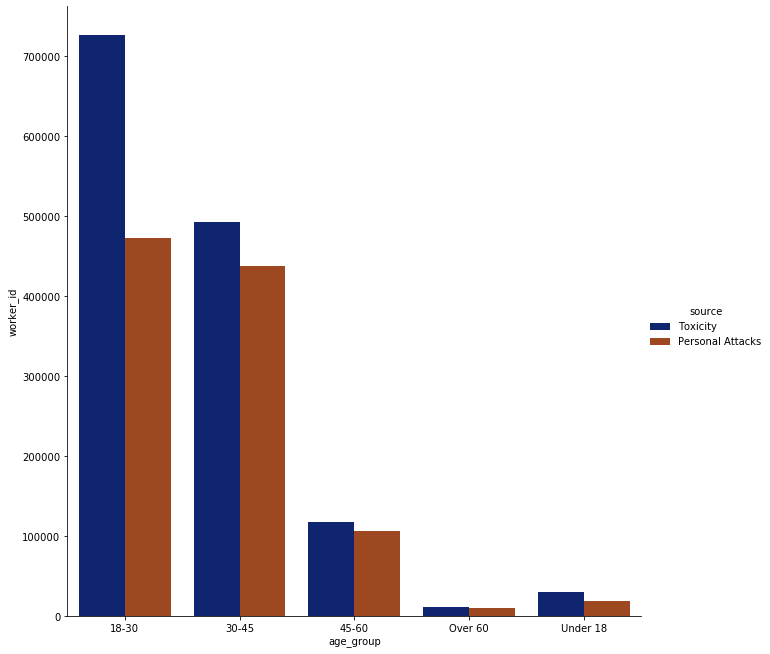

In [14]:
plot=sns.catplot(data=final, kind="bar", x="age_group", y="worker_id", hue="source",palette="dark", height=9)
plot.savefig("images/Age_group_demographics.png")

We notice that the number of workers in the age bracket 18-30 has the most number of annotators. According to https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf the highest number of people fall in this age bracket.
Thus in terms of age demography both data sets would resemble the general population.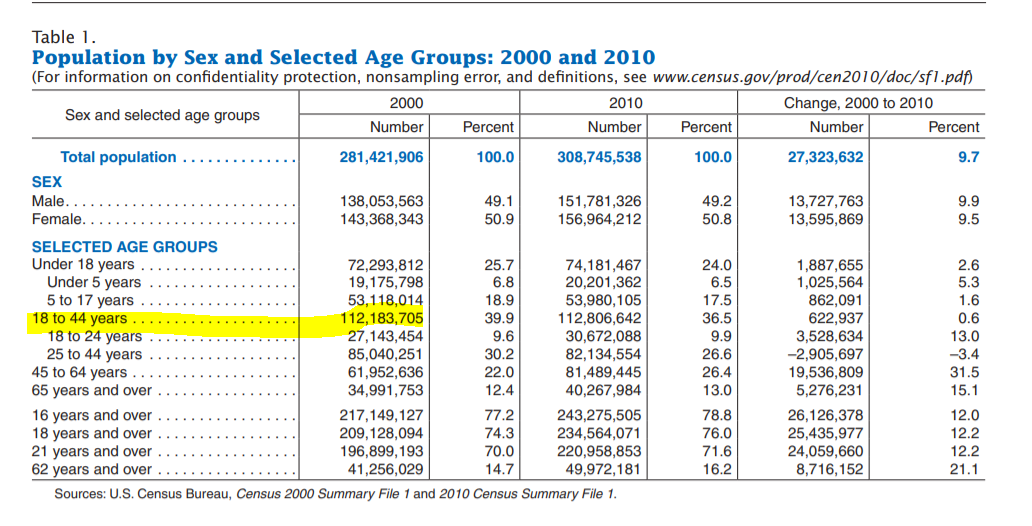

##### Education


In [15]:
tox_res=toxicity_annotations_demographics.groupby(['education']).worker_id.count().reset_index()
pa_res=personal_attack_annotations_demographics.groupby(['education']).worker_id.count().reset_index()
tox_res['Source']='Toxicity'
pa_res['Source']='Personal Attacks'
final=[tox_res,pa_res]
final = pd.concat(final)
final

,education,worker_id,Source
0,bachelors,560806,Toxicity
1,doctorate,16959,Toxicity
2,hs,399321,Toxicity
3,masters,214604,Toxicity
4,none,1044,Toxicity
5,professional,175602,Toxicity
6,some,35584,Toxicity
0,bachelors,408213,Personal Attacks
1,doctorate,11372,Personal Attacks
2,hs,306930,Personal Attacks


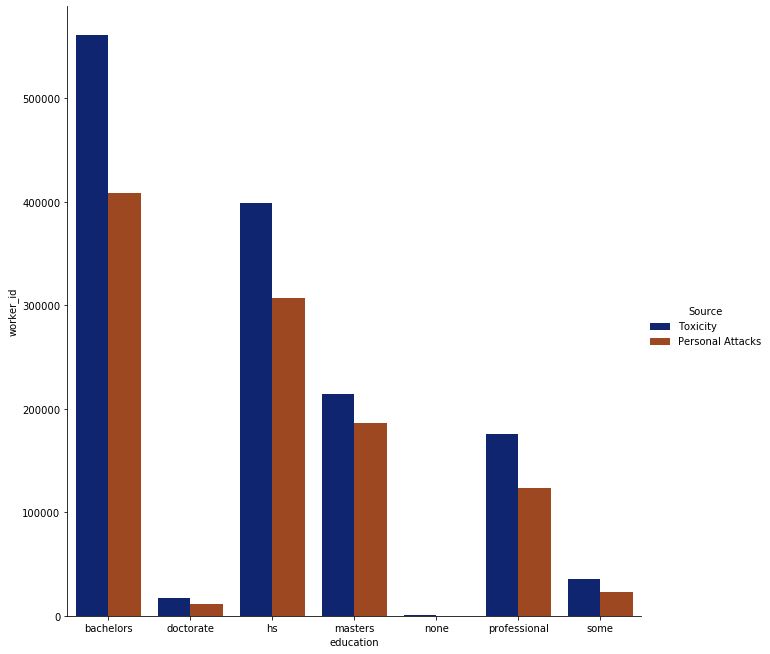

In [16]:
plot=sns.catplot(data=final, kind="bar", x="education", y="worker_id", hue="Source",palette="dark", height=9)
plot.savefig("images/Education_demographics.png")

We see that most of the annotators have eduacational level of bachelors and very less number had doctorates . This is similar to the general scenario as shown in https://performance.commerce.gov/stories/s/U-S-Population-Spotlight-Educational-Attainment/na47-j74r/ in th visualisation. Though I did not find any data/visualisation with the same categorisation of the levels of education, the below images is the closest. It also validates our idea of general public as reflected by the visualisation. Here also we can see that bachelors have the highest % and doctorates the least percentage.
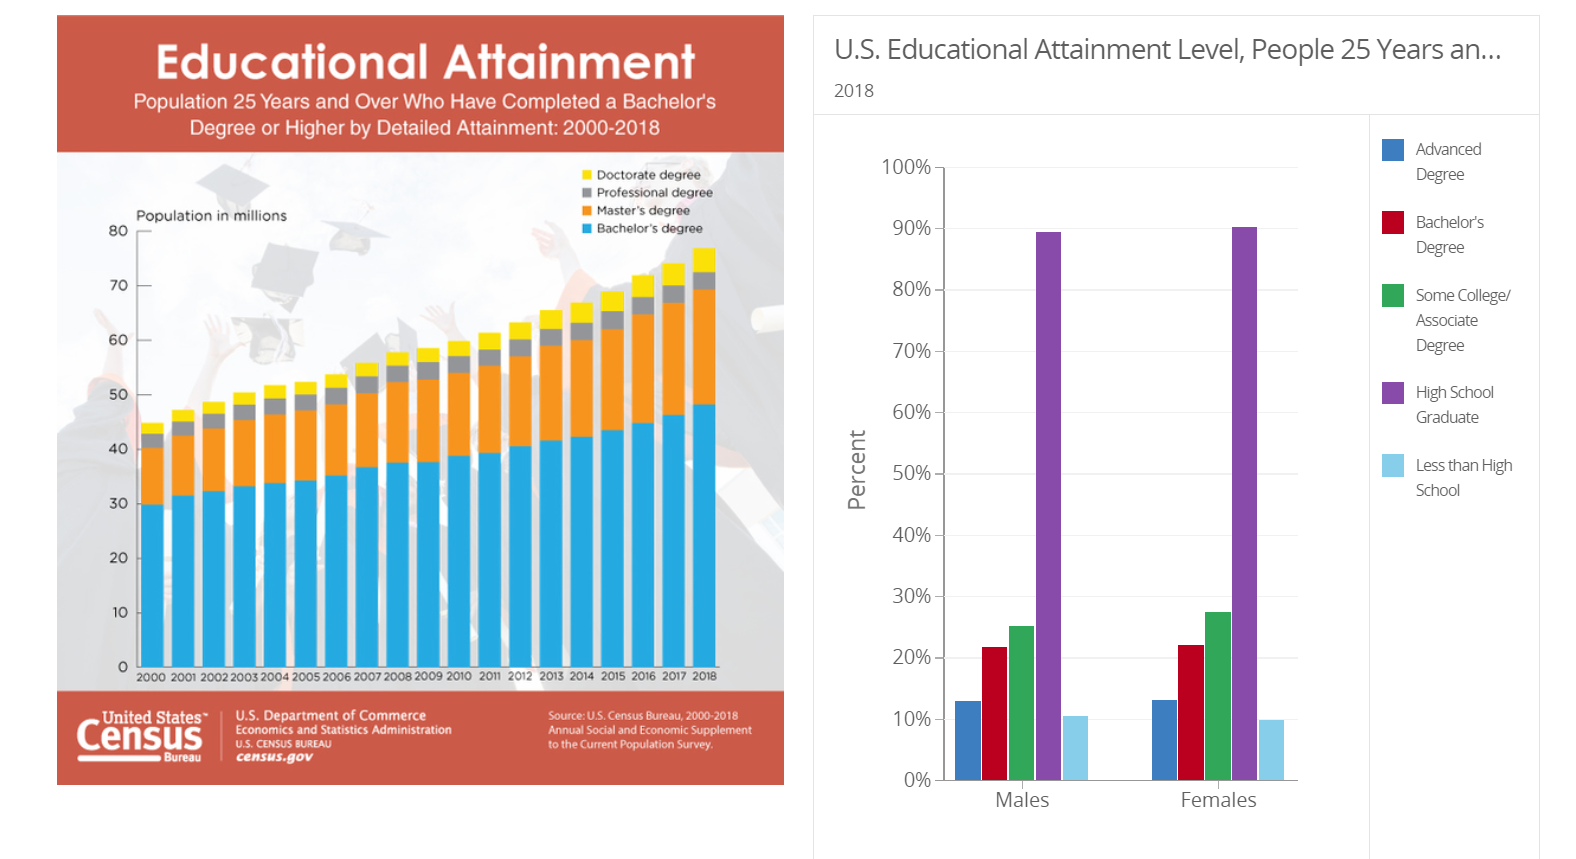

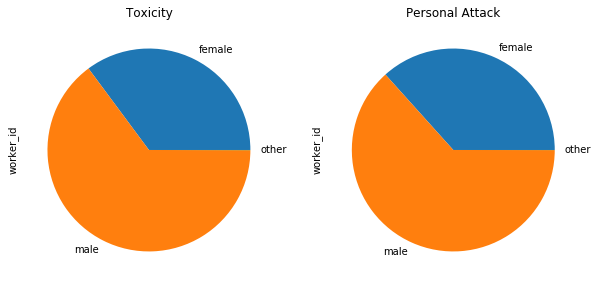

In [17]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))
res_tox=toxicity_annotations_demographics.groupby(['gender']).worker_id.count()
res_tox.plot.pie(y='worker_id',ax=axes[0],title="Toxicity")
res_pa=personal_attack_annotations_demographics.groupby(['gender']).worker_id.count()
res_pa.plot.pie(y='worker_id',ax=axes[1],title="Personal Attack")
plt.savefig("images/Gender_demographics.png")

Both demographics show highly biased and male dominated poplution, where as the in general the % of women in the world lies around 49.65% in 2001-2015 according to the graph in https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS?end=2015&start=2000. 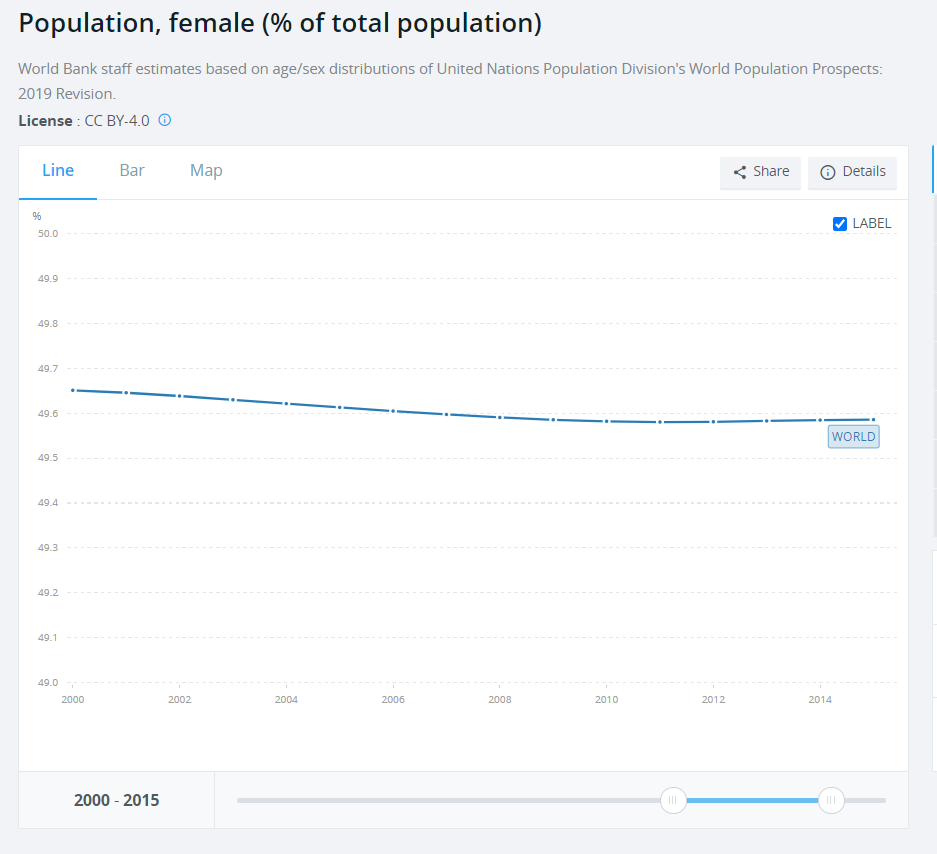

##### **Presentation of results:**

We conclude that the given annotators represent the general population in terms of the age, education, but it is highly biased in terms of the gender. If a model trained on this dataset it will have be biased to give results that are determined by the male gender. For example if a regression model is trained such that we create one hot encoded columns for gender then the coefficient of the male column will be much higher. Thus, it will have an higher impact on the final result. When applied to general population, the results will be more influenced by the male coffiecients than the female cofficients and thus reduce the effect of columns correlated with the female column. This will create a bias in the dataset.


Thus there is a bias in age and education that reflects the general population. There is a gender bias that does not represent the general population.

#### **2. Explore relationships between worker demographics and labeling behavior.**

##### **Motivation for the analysis:** 
We explore that various demographic factors and if they have an effect on the labelling. We need to check if certain group of people may have a preferance to flag a comment as toxic or attack. We need to also account for the population in that group, and not just compare the raw counts of toxic or attack flags. I decided to do this analysis because age, gender and education effect a human's perspective and outlook. For example: something that is toxic to a 6 year old may not be so to 20 year old, each gender defines personal attacks in a different way. We need to check if there are such biases in the data.The 3 demographic information used here are - **age, education level and gender**



##### Gender

Annotator counts
        worker_id  Percentage
gender                       
female     493589   35.157915
male       909893   64.810887
other         438    0.031198
Toxicity counts
        toxicity  Percentage
gender                      
female     71408   35.207226
male      131338   64.755303
other         76    0.037471
Toxicity average counts
gender
female    0.144671
male      0.144344
other     0.173516
Name: toxicity, dtype: float64
Toxicity scores
gender
female    0.194672
male      0.218925
other     0.219178
Name: toxicity_score, dtype: float64


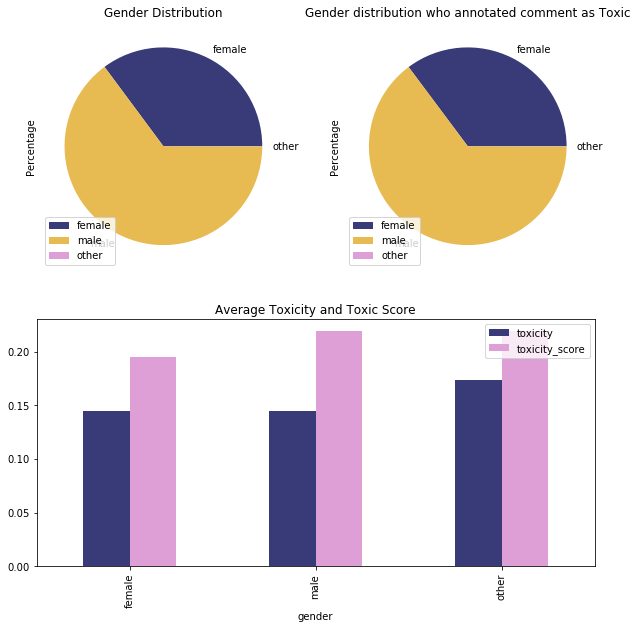

In [18]:
print("Annotator counts")
worker_df=toxicity_annotations_demographics.groupby(['gender']).worker_id.count().reset_index()
worker_df['Percentage']=worker_df['worker_id']/sum(worker_df['worker_id'])*100
worker_df=worker_df.set_index('gender')
print(worker_df)
print("Toxicity counts")
toxicity_df=toxicity_annotations_demographics.groupby(['gender']).toxicity.sum().reset_index()
toxicity_df['Percentage']=toxicity_df['toxicity']/sum(toxicity_df['toxicity'])*100
toxicity_df=toxicity_df.set_index('gender')
print(toxicity_df)
print("Toxicity average counts")
toxicity_avg_df=toxicity_annotations_demographics.groupby(['gender']).toxicity.mean()
print(toxicity_avg_df)
print("Toxicity scores")
toxicity_score_df=toxicity_annotations_demographics.groupby(['gender']).toxicity_score.mean()
print(toxicity_score_df)
final=pd.merge(toxicity_avg_df.reset_index(),toxicity_score_df.reset_index(), on='gender')
final=final.set_index('gender')
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2,2,(3,4))
worker_df.plot.pie(y='Percentage',ax=ax1, title="Gender Distribution",colormap ='tab20b',figsize=(10,10))
toxicity_df.plot.pie(y='Percentage',ax=ax2, title="Gender distribution who annotated comment as Toxic",colormap ='tab20b',figsize=(10,10))
final.plot.bar(y=['toxicity','toxicity_score'],colormap ='tab20b',ax=ax3,figsize=(10,10),title="Average Toxicity and Toxic Score")
plt.savefig("images/Toxicity_gender.png")

We observe that males annotate the comment as toxic twice many times as the females annotaters. This may be due to the imbalance in their populations. Males are twice many as the females. So, we find the average toxic scores and the average number of time the comment if flagged toxic. We find this remains consistent in the genders. Thus gender does not create a bias

Annotator counts
        worker_id  Percentage
gender                       
female     388219   36.663103
male       670479   63.319520
other         184    0.017377
Personal Attack counts
        toxicity  Percentage
gender                      
female     71408   35.207226
male      131338   64.755303
other         76    0.037471
Personal Attack average counts
gender
female    0.155845
male      0.156333
other     0.092391
Name: attack, dtype: float64


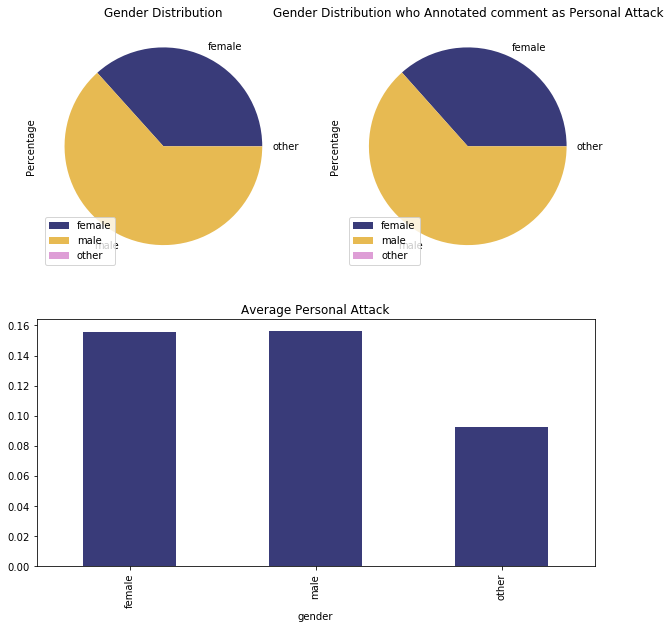

In [19]:
print("Annotator counts")
worker_df=personal_attack_annotations_demographics.groupby(['gender']).worker_id.count().reset_index()
worker_df['Percentage']=worker_df['worker_id']/sum(worker_df['worker_id'])*100
worker_df=worker_df.set_index('gender')
print(worker_df)
print("Personal Attack counts")
pa_df=personal_attack_annotations_demographics.groupby(['gender']).attack.sum().reset_index()
pa_df['Percentage']=pa_df['attack']/sum(pa_df['attack'])*100
pa_df=pa_df.set_index('gender')
print(toxicity_df)
print("Personal Attack average counts")
pa_avg_df=personal_attack_annotations_demographics.groupby(['gender']).attack.mean()
print(pa_avg_df)
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2,2,(3,4))
worker_df.plot.pie(y='Percentage',ax=ax1, title="Gender Distribution",colormap ='tab20b',figsize=(10,10))
pa_df.plot.pie(y='Percentage',ax=ax2, title="Gender Distribution who Annotated comment as Personal Attack",colormap ='tab20b',figsize=(20,20))
pa_avg_df.plot.bar(y=['attack'],colormap ='tab20b',ax=ax3,figsize=(10,10),title="Average Personal Attack")
plt.savefig("images/Personal_attack_gender.png")

We find similar results in Personal Attacks

##### Age Group

Annotator counts
           worker_id  Percentage
age_group                       
18-30         725606   52.784014
30-45         492067   35.795282
45-60         117030    8.513316
Over 60        10449    0.760110
Under 18       29518    2.147279
Toxicity counts
           toxicity  Percentage
age_group                      
18-30        103901   52.255936
30-45         71668   36.044681
45-60         17015    8.557519
Over 60        1870    0.940497
Under 18       4377    2.201367
Toxicity average counts
age_group
18-30       0.143192
30-45       0.145647
45-60       0.145390
Over 60     0.178964
Under 18    0.148282
Name: toxicity, dtype: float64
Toxicity scores
age_group
18-30       0.222115
30-45       0.200233
45-60       0.181449
Over 60     0.118193
Under 18    0.242598
Name: toxicity_score, dtype: float64


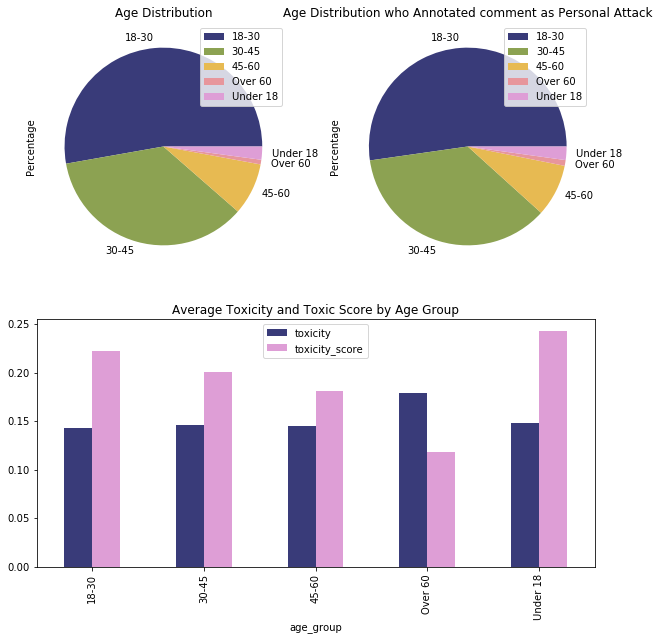

In [20]:
print("Annotator counts")
worker_df=toxicity_annotations_demographics.groupby(['age_group']).worker_id.count().reset_index()
worker_df['Percentage']=worker_df['worker_id']/sum(worker_df['worker_id'])*100
worker_df=worker_df.set_index('age_group')
print(worker_df)
print("Toxicity counts")
toxicity_df=toxicity_annotations_demographics.groupby(['age_group']).toxicity.sum().reset_index()
toxicity_df['Percentage']=toxicity_df['toxicity']/sum(toxicity_df['toxicity'])*100
toxicity_df=toxicity_df.set_index('age_group')
print(toxicity_df)
print("Toxicity average counts")
toxicity_avg_df=toxicity_annotations_demographics.groupby(['age_group']).toxicity.mean()
print(toxicity_avg_df)
print("Toxicity scores")
toxicity_score_df=toxicity_annotations_demographics.groupby(['age_group']).toxicity_score.mean()
print(toxicity_score_df)
final=pd.merge(toxicity_avg_df.reset_index(),toxicity_score_df.reset_index(), on='age_group')
final=final.set_index('age_group')
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2,2,(3,4))
worker_df.plot.pie(y='Percentage',ax=ax1, title="Age Distribution",colormap ='tab20b',figsize=(10,10))
toxicity_df.plot.pie(y='Percentage',ax=ax2, title="Age Distribution who Annotated comment as Personal Attack",colormap ='tab20b',figsize=(10,10))
final.plot.bar(y=['toxicity','toxicity_score'],colormap ='tab20b',ax=ax3,figsize=(10,10),title="Average Toxicity and Toxic Score by Age Group")
plt.savefig("images/Toxicity_age_group.png")

We observe that people within age-group 18-30yrs annotate the comment as toxic many times as the other age group annotaters. This may be due to the imbalance in their age group populations. So, we find the average toxic scores and the average number of time the comment if flagged toxic. We find this remains consistent in the genders. Thus age group does not create a bias

Annotator counts
           worker_id  Percentage
age_group                       
18-30         472780   45.248644
30-45         437009   41.825087
45-60         106047   10.149505
Over 60        10087    0.965403
Under 18       18926    1.811362
Personal Attack counts
           toxicity  Percentage
age_group                      
18-30        103901   52.255936
30-45         71668   36.044681
45-60         17015    8.557519
Over 60        1870    0.940497
Under 18       4377    2.201367
Personal Attack average counts
age_group
18-30       0.154509
30-45       0.156253
45-60       0.159807
Over 60     0.164271
Under 18    0.169449
Name: attack, dtype: float64


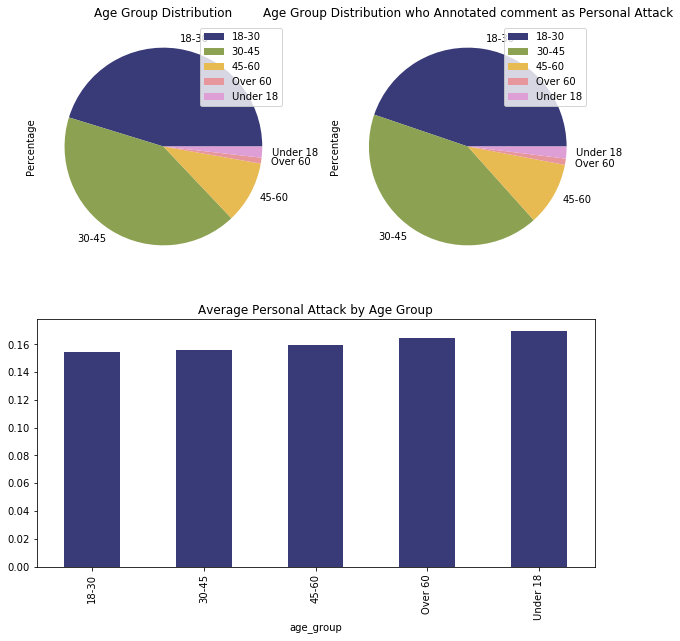

In [21]:
print("Annotator counts")
worker_df=personal_attack_annotations_demographics.groupby(['age_group']).worker_id.count().reset_index()
worker_df['Percentage']=worker_df['worker_id']/sum(worker_df['worker_id'])*100
worker_df=worker_df.set_index('age_group')
print(worker_df)
print("Personal Attack counts")
pa_df=personal_attack_annotations_demographics.groupby(['age_group']).attack.sum().reset_index()
pa_df['Percentage']=pa_df['attack']/sum(pa_df['attack'])*100
pa_df=pa_df.set_index('age_group')
print(toxicity_df)
print("Personal Attack average counts")
pa_avg_df=personal_attack_annotations_demographics.groupby(['age_group']).attack.mean()
print(pa_avg_df)
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2,2,(3,4))
worker_df.plot.pie(y='Percentage',ax=ax1, title="Age Group Distribution",colormap ='tab20b',figsize=(10,10))
pa_df.plot.pie(y='Percentage',ax=ax2, title="Age Group Distribution who Annotated comment as Personal Attack",colormap ='tab20b',figsize=(20,20))
pa_avg_df.plot.bar(y=['attack'],colormap ='tab20b',ax=ax3,figsize=(10,10),title="Average Personal Attack by Age Group")
plt.savefig("images/Personal_attack_age_group.png")

We find similar results in Personal Attacks

##### Education

Annotator counts
              worker_id  Percentage
education                          
bachelors        560806   39.945723
doctorate         16959    1.207975
hs               399321   28.443287
masters          214604   15.286056
none               1044    0.074363
professional     175602   12.507978
some              35584    2.534617
Toxicity counts
              toxicity  Percentage
education                         
bachelors        81350   40.109061
doctorate         2330    1.148791
hs               57018   28.112335
masters          31093   15.330191
none               175    0.086283
professional     25587   12.615495
some              5269    2.597844
Toxicity average counts
education
bachelors       0.145059
doctorate       0.137390
hs              0.142787
masters         0.144885
none            0.167625
professional    0.145710
some            0.148072
Name: toxicity, dtype: float64
Toxicity scores
education
bachelors       0.211820
doctorate       0.222478
hs          

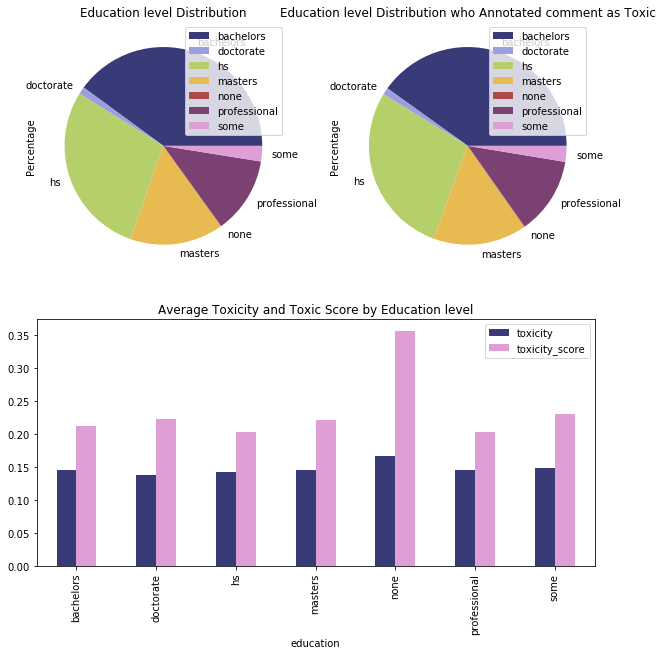

In [22]:
print("Annotator counts")
worker_df=toxicity_annotations_demographics.groupby(['education']).worker_id.count().reset_index()
worker_df['Percentage']=worker_df['worker_id']/sum(worker_df['worker_id'])*100
worker_df=worker_df.set_index('education')
print(worker_df)
print("Toxicity counts")
toxicity_df=toxicity_annotations_demographics.groupby(['education']).toxicity.sum().reset_index()
toxicity_df['Percentage']=toxicity_df['toxicity']/sum(toxicity_df['toxicity'])*100
toxicity_df=toxicity_df.set_index('education')
print(toxicity_df)
print("Toxicity average counts")
toxicity_avg_df=toxicity_annotations_demographics.groupby(['education']).toxicity.mean()
print(toxicity_avg_df)
print("Toxicity scores")
toxicity_score_df=toxicity_annotations_demographics.groupby(['education']).toxicity_score.mean()
print(toxicity_score_df)
final=pd.merge(toxicity_avg_df.reset_index(),toxicity_score_df.reset_index(), on='education')
final=final.set_index('education')
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2,2,(3,4))
worker_df.plot.pie(y='Percentage',ax=ax1, title="Education level Distribution",colormap ='tab20b',figsize=(10,10))
toxicity_df.plot.pie(y='Percentage',ax=ax2, title="Education level Distribution who Annotated comment as Toxic",colormap ='tab20b',figsize=(10,10))
final.plot.bar(y=['toxicity','toxicity_score'],colormap ='tab20b',ax=ax3,figsize=(10,10),title="Average Toxicity and Toxic Score by Education level")
plt.savefig("images/Toxicity_education_levels.png")

We observe that people with bachelors annotate the comment as toxic many times as the other education category annotaters. This may be due to the imbalance in their education category populations. So, we find the average toxic scores and the average number of time the comment if flagged toxic. We find this remains consistent in the education category. Thus education category does not create a bias. The average toxic score of 'none' is quite high. But since we do not know the specifics we cannot comment on the conext why it is so high

Annotator counts
              worker_id  Percentage
education                          
bachelors        408213   38.551321
doctorate         11372    1.073963
hs               306930   28.986233
masters          186000   17.565697
none                194    0.018321
professional     123175   11.632552
some              22998    2.171913
Personal Attack counts
              toxicity  Percentage
education                         
bachelors        81350   40.109061
doctorate         2330    1.148791
hs               57018   28.112335
masters          31093   15.330191
none               175    0.086283
professional     25587   12.615495
some              5269    2.597844
Personal Attack average counts
education
bachelors       0.156208
doctorate       0.160834
hs              0.151937
masters         0.163892
none            0.195876
professional    0.154187
some            0.156274
Name: attack, dtype: float64


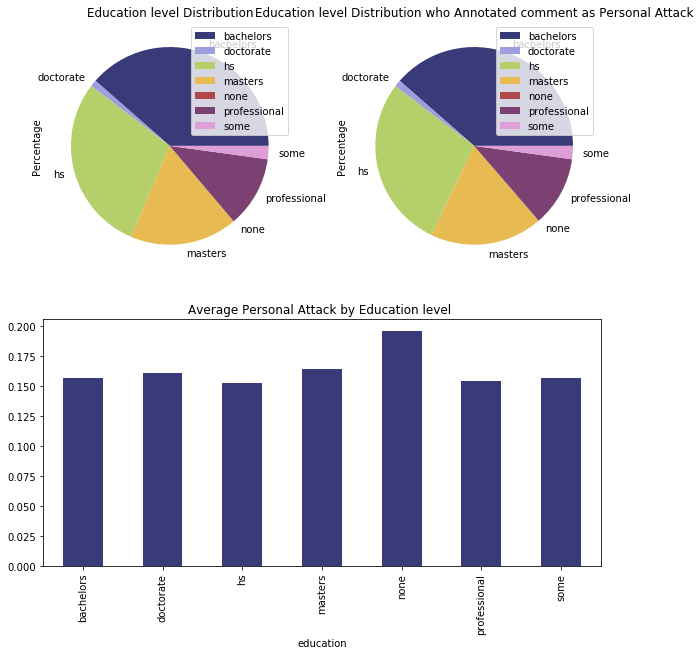

In [23]:
print("Annotator counts")
worker_df=personal_attack_annotations_demographics.groupby(['education']).worker_id.count().reset_index()
worker_df['Percentage']=worker_df['worker_id']/sum(worker_df['worker_id'])*100
worker_df=worker_df.set_index('education')
print(worker_df)
print("Personal Attack counts")
pa_df=personal_attack_annotations_demographics.groupby(['education']).attack.sum().reset_index()
pa_df['Percentage']=pa_df['attack']/sum(pa_df['attack'])*100
pa_df=pa_df.set_index('education')
print(toxicity_df)
print("Personal Attack average counts")
pa_avg_df=personal_attack_annotations_demographics.groupby(['education']).attack.mean()
print(pa_avg_df)
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2,2,(3,4))
worker_df.plot.pie(y='Percentage',ax=ax1, title="Education level Distribution",colormap ='tab20b',figsize=(10,10))
pa_df.plot.pie(y='Percentage',ax=ax2, title="Education level Distribution who Annotated comment as Personal Attack",colormap ='tab20b',figsize=(20,20))
pa_avg_df.plot.bar(y=['attack'],colormap ='tab20b',ax=ax3,figsize=(10,10),title="Average Personal Attack by Education level ")
plt.savefig("images/Personal_attack_education_levels.png")

Personal Attacks have similar results

##### **Presentation of results:**

We find gender, education and age does not create a bias on the toxicity and personal attack flag. Thus we can carry out any analysis without adjusting for a bias

### Step 1.3: Presentation of results:

#### **1. Analyze the demographic information about the Crowdflower workers that is available in the dataset and how it fits the real world population.**

There is a bias in age and education that reflects the general population. There is a gender bias that does not represent the general population.

#### **2. Explore relationships between worker demographics and labeling behavior.**

Gender, education and age does not create a bias on the toxicity and personal attack flag.

## STEP2:Discuss further implications

**Implications for research and product development:** 


#### Q1: Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?
 1. **Comment Blur Filter:** [(link)](https://github.com/conversationai/perspective-hacks/tree/master/comment_filter) Perspective API—or any model trained on the Wikipedia Talk corpus will help in the proper categorisation of the comments into toxic and non-toxic categories. Thus, I would expect them to perform well. Also since the usecase involves free platforms for conversation and no niche scope of discussion, I would expect it to do well.
 2. **WikiDetox:** [(link)](https://github.com/conversationai/wikidetox) This is a very good application where Perspective API—or any model trained on the Wikipedia Talk corpus could perform well as the goal matches the intent for creation of API and data
 3. **Author Perspective for Drupal** [(link)](https://www.drupal.org/project/perspective) Here we need to filter the toxic and comments causing harassment. This is a perfect usecase for Perspective API—or any model trained on the Wikipedia Talk corpus
 
#### Q2:Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?
 1. **Toxicity Timeline:** [(link)](https://github.com/conversationai/perspective-hacks/blob/master/toxicity_timeline/README.md)It would perform poorly because time is not given to the required accuracy in Wikipedia corpus
 2. **An authorship experience demo for Perspective API:** [(link)](https://github.com/conversationai/perspectiveapi-authorship-demo) It Perspective API may not perform well as this is a feedback data. Comments are generally free form and do not have a theme. Also, people are more likely to comment on anything they like or not, but mostly are biased to give a feedback only when the feedback is negative.
 3. **Hot Topics** [(link)](https://github.com/conversationai/perspective-hacks/blob/master/hot_topics/README.md): The data covered in Wikipedia talk corpus is comment based. This demo checks the whole of the document. The Perspective API may or may not be able to perform well here
 
#### Q3:What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 
 1. Any comments not in English would be difficult to accurately detect using the approach used to train the Perspective API models. This would be because the model would be trained in English, and if the model encounters any negative word, it may not understand that it is toxic/aggresive, due to change in language/font etc.
 2. Sarcasm could be difficult to detect with these models
 3. Any data other than comment-like data may not perform well here. For example- it would be difficult to detect a lenghty toxic news article because comments are generally the length of 1-10 sentences. 